In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 **I'm Using Google Colab to run the code and this will grant colab access to gdrive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
from google.colab import files
uploaded = files.upload()

Saving all_armed_conflict_location_event_data_jan_1_dec_31_2015_nigeria.csv to all_armed_conflict_location_event_data_jan_1_dec_31_2015_nigeria.csv
Saving all_armed_conflict_location_event_data_jan_1_dec_31_2016_nigeria.csv to all_armed_conflict_location_event_data_jan_1_dec_31_2016_nigeria.csv
Saving all_armed_conflict_location_event_data_jan_1_dec_31_2017_nigeria.csv to all_armed_conflict_location_event_data_jan_1_dec_31_2017_nigeria.csv
Saving all_armed_conflict_location_event_data_jan_1_jun_23_2018_nigeria.csv to all_armed_conflict_location_event_data_jan_1_jun_23_2018_nigeria.csv


**using io module for decoding**

In [0]:
import io
viewdf1=pd.read_csv(io.StringIO(uploaded['all_armed_conflict_location_event_data_jan_1_dec_31_2015_nigeria.csv'].decode('utf-8')))
viewdf2=pd.read_csv(io.StringIO(uploaded['all_armed_conflict_location_event_data_jan_1_dec_31_2016_nigeria.csv'].decode('utf-8')))
viewdf3=pd.read_csv(io.StringIO(uploaded['all_armed_conflict_location_event_data_jan_1_dec_31_2017_nigeria.csv'].decode('utf-8')))
viewdf4=pd.read_csv(io.StringIO(uploaded['all_armed_conflict_location_event_data_jan_1_jun_23_2018_nigeria.csv'].decode('utf-8')))

## ***combined dataset***

In [8]:
view_com_df=pd.concat([viewdf1,viewdf2,viewdf3,viewdf4])
view_com_df.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,location_2
0,1458081,566,NIG8555,8555,31 December 2015,2015,1,Riots/Protests,Protesters (Nigeria),PDP: Peoples Democratic Party,6,60,Western Africa,Nigeria,Abia,Umuahia North,NaN,Umuahia,5.5263,7.4896,1,This Day (Lagos),Subnational,Following a court ruling regarding the appeal ...,0,1524053911,NGA,POINT(7.4896 5.5263)
1,1458082,566,NIG8554,8554,31 December 2015,2015,1,Riots/Protests,Protesters (Nigeria),PDP: Peoples Democratic Party,6,60,Western Africa,Nigeria,Abia,Aba South,NaN,Aba,5.1066,7.3667,1,This Day (Lagos),Subnational,Following a court ruling regarding the appeal ...,0,1524053911,NGA,POINT(7.3667 5.1066)
2,1458176,566,NIG8553,8553,30 December 2015,2015,1,Strategic development,Vigilante Militia (Nigeria),NaN,4,47,Western Africa,Nigeria,Delta,Isoko South,NaN,Irri,5.4411,6.2140,1,Leadership (Abuja),Subnational,"Non-violent activity: A mob in Irri, Isoko sou...",0,1524053911,NGA,POINT(6.214 5.4411)
3,1458176,566,NIG8553,8553,30 December 2015,2015,1,Strategic development,Civilians (Nigeria),NaN,7,47,Western Africa,Nigeria,Delta,Isoko South,NaN,Irri,5.4411,6.2140,1,Leadership (Abuja),Subnational,"Non-violent activity: A mob in Irri, Isoko sou...",0,1524053911,NGA,POINT(6.214 5.4411)
4,1458242,566,NIG8552,8552,29 December 2015,2015,1,Riots/Protests,Protesters (Nigeria),NaN,6,60,Western Africa,Nigeria,Rivers,Port Harcourt,NaN,Port Harcourt,4.7774,7.0134,1,Vanguard (Lagos),Subnational,Labours protest non-payment of contracts in Po...,0,1524053911,NGA,POINT(7.0134 4.7774)


saving it o single CSV file

In [0]:
view_com_df.to_csv('all_combined_armed_conflicts.csv',index=False, encoding='utf-8')

In [0]:
view_com_df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'actor1', 'assoc_actor_1',
       'inter1', 'interaction', 'region', 'country', 'admin1', 'admin2',
       'admin3', 'location', 'latitude', 'longitude', 'geo_precision',
       'source', 'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3',
       'location_2'],
      dtype='object')

**EDA**

In [10]:
view_com_df.head(2)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,location_2
0,1458081,566,NIG8555,8555,31 December 2015,2015,1,Riots/Protests,Protesters (Nigeria),PDP: Peoples Democratic Party,6,60,Western Africa,Nigeria,Abia,Umuahia North,NaN,Umuahia,5.5263,7.4896,1,This Day (Lagos),Subnational,Following a court ruling regarding the appeal ...,0,1524053911,NGA,POINT(7.4896 5.5263)
1,1458082,566,NIG8554,8554,31 December 2015,2015,1,Riots/Protests,Protesters (Nigeria),PDP: Peoples Democratic Party,6,60,Western Africa,Nigeria,Abia,Aba South,NaN,Aba,5.1066,7.3667,1,This Day (Lagos),Subnational,Following a court ruling regarding the appeal ...,0,1524053911,NGA,POINT(7.3667 5.1066)


In [0]:
view_com_df.drop_duplicates(subset='data_id', keep='first',inplace=True)

In [12]:
view_com_df.drop(['data_id','iso','event_id_cnty','event_id_no_cnty','actor1','assoc_actor_1','region','country','admin1','admin2','admin3','location','source','notes','source_scale','iso3','location_2'], axis=1, inplace=True)
view_com_df

,event_date,year,time_precision,event_type,inter1,interaction,latitude,longitude,geo_precision,fatalities,timestamp
0,31 December 2015,2015,1,Riots/Protests,6,60,5.5263,7.4896,1,0,1524053911
1,31 December 2015,2015,1,Riots/Protests,6,60,5.1066,7.3667,1,0,1524053911
2,30 December 2015,2015,1,Strategic development,4,47,5.4411,6.2140,1,0,1524053911
4,29 December 2015,2015,1,Riots/Protests,6,60,4.7774,7.0134,1,0,1524053911
5,29 December 2015,2015,1,Riots/Protests,5,15,6.3945,7.9765,2,0,1524053911
...,...,...,...,...,...,...,...,...,...,...,...
1641,01 January 2018,2018,1,Violence against civilians,3,37,5.3435,6.6532,1,17,1524053830
1643,01 January 2018,2018,1,Strategic development,2,27,12.6786,13.6079,1,0,1524053830
1645,01 January 2018,2018,1,Violence against civilians,4,47,8.1000,9.1333,2,4,1524053830
1647,01 January 2018,2018,1,Violence against civilians,4,47,7.8155,8.8604,2,18,1524053830


In [13]:
view_com_df.isnull().sum()

event_date        0
year              0
time_precision    0
event_type        0
inter1            0
interaction       0
latitude          0
longitude         0
geo_precision     0
fatalities        0
timestamp         0
dtype: int64

converting the event_date to normal Unix TimeStamp

In [0]:
import time
import datetime
from datetime import timezone


In [16]:
view_com_df['timestampcon']=pd.to_datetime(view_com_df['event_date'])
view_com_df

,event_date,year,time_precision,event_type,inter1,interaction,latitude,longitude,geo_precision,fatalities,timestamp,timestampcon
0,31 December 2015,2015,1,Riots/Protests,6,60,5.5263,7.4896,1,0,1524053911,2015-12-31
1,31 December 2015,2015,1,Riots/Protests,6,60,5.1066,7.3667,1,0,1524053911,2015-12-31
2,30 December 2015,2015,1,Strategic development,4,47,5.4411,6.2140,1,0,1524053911,2015-12-30
4,29 December 2015,2015,1,Riots/Protests,6,60,4.7774,7.0134,1,0,1524053911,2015-12-29
5,29 December 2015,2015,1,Riots/Protests,5,15,6.3945,7.9765,2,0,1524053911,2015-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...
1641,01 January 2018,2018,1,Violence against civilians,3,37,5.3435,6.6532,1,17,1524053830,2018-01-01
1643,01 January 2018,2018,1,Strategic development,2,27,12.6786,13.6079,1,0,1524053830,2018-01-01
1645,01 January 2018,2018,1,Violence against civilians,4,47,8.1000,9.1333,2,4,1524053830,2018-01-01
1647,01 January 2018,2018,1,Violence against civilians,4,47,7.8155,8.8604,2,18,1524053830,2018-01-01


In [17]:
type(view_com_df['timestampcon'])

pandas.core.series.Series

In [18]:
tmstmparr = []

for row in view_com_df.itertuples():
    tmstmparr.append(row.timestampcon.replace(tzinfo = timezone.utc).timestamp())

view_com_df['newtimestamp'] = tmstmparr
view_com_df.head(4)

,event_date,year,time_precision,event_type,inter1,interaction,latitude,longitude,geo_precision,fatalities,timestamp,timestampcon,newtimestamp
0,31 December 2015,2015,1,Riots/Protests,6,60,5.5263,7.4896,1,0,1524053911,2015-12-31,1.451520e+09
1,31 December 2015,2015,1,Riots/Protests,6,60,5.1066,7.3667,1,0,1524053911,2015-12-31,1.451520e+09
2,30 December 2015,2015,1,Strategic development,4,47,5.4411,6.2140,1,0,1524053911,2015-12-30,1.451434e+09
4,29 December 2015,2015,1,Riots/Protests,6,60,4.7774,7.0134,1,0,1524053911,2015-12-29,1.451347e+09


the cleaned dataset can be safed and use in model 

In [0]:
view_com_df.to_csv('datetimeunix.csv', encoding='utf-8')
from google.colab import files
files.download("datetimeunix.csv")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

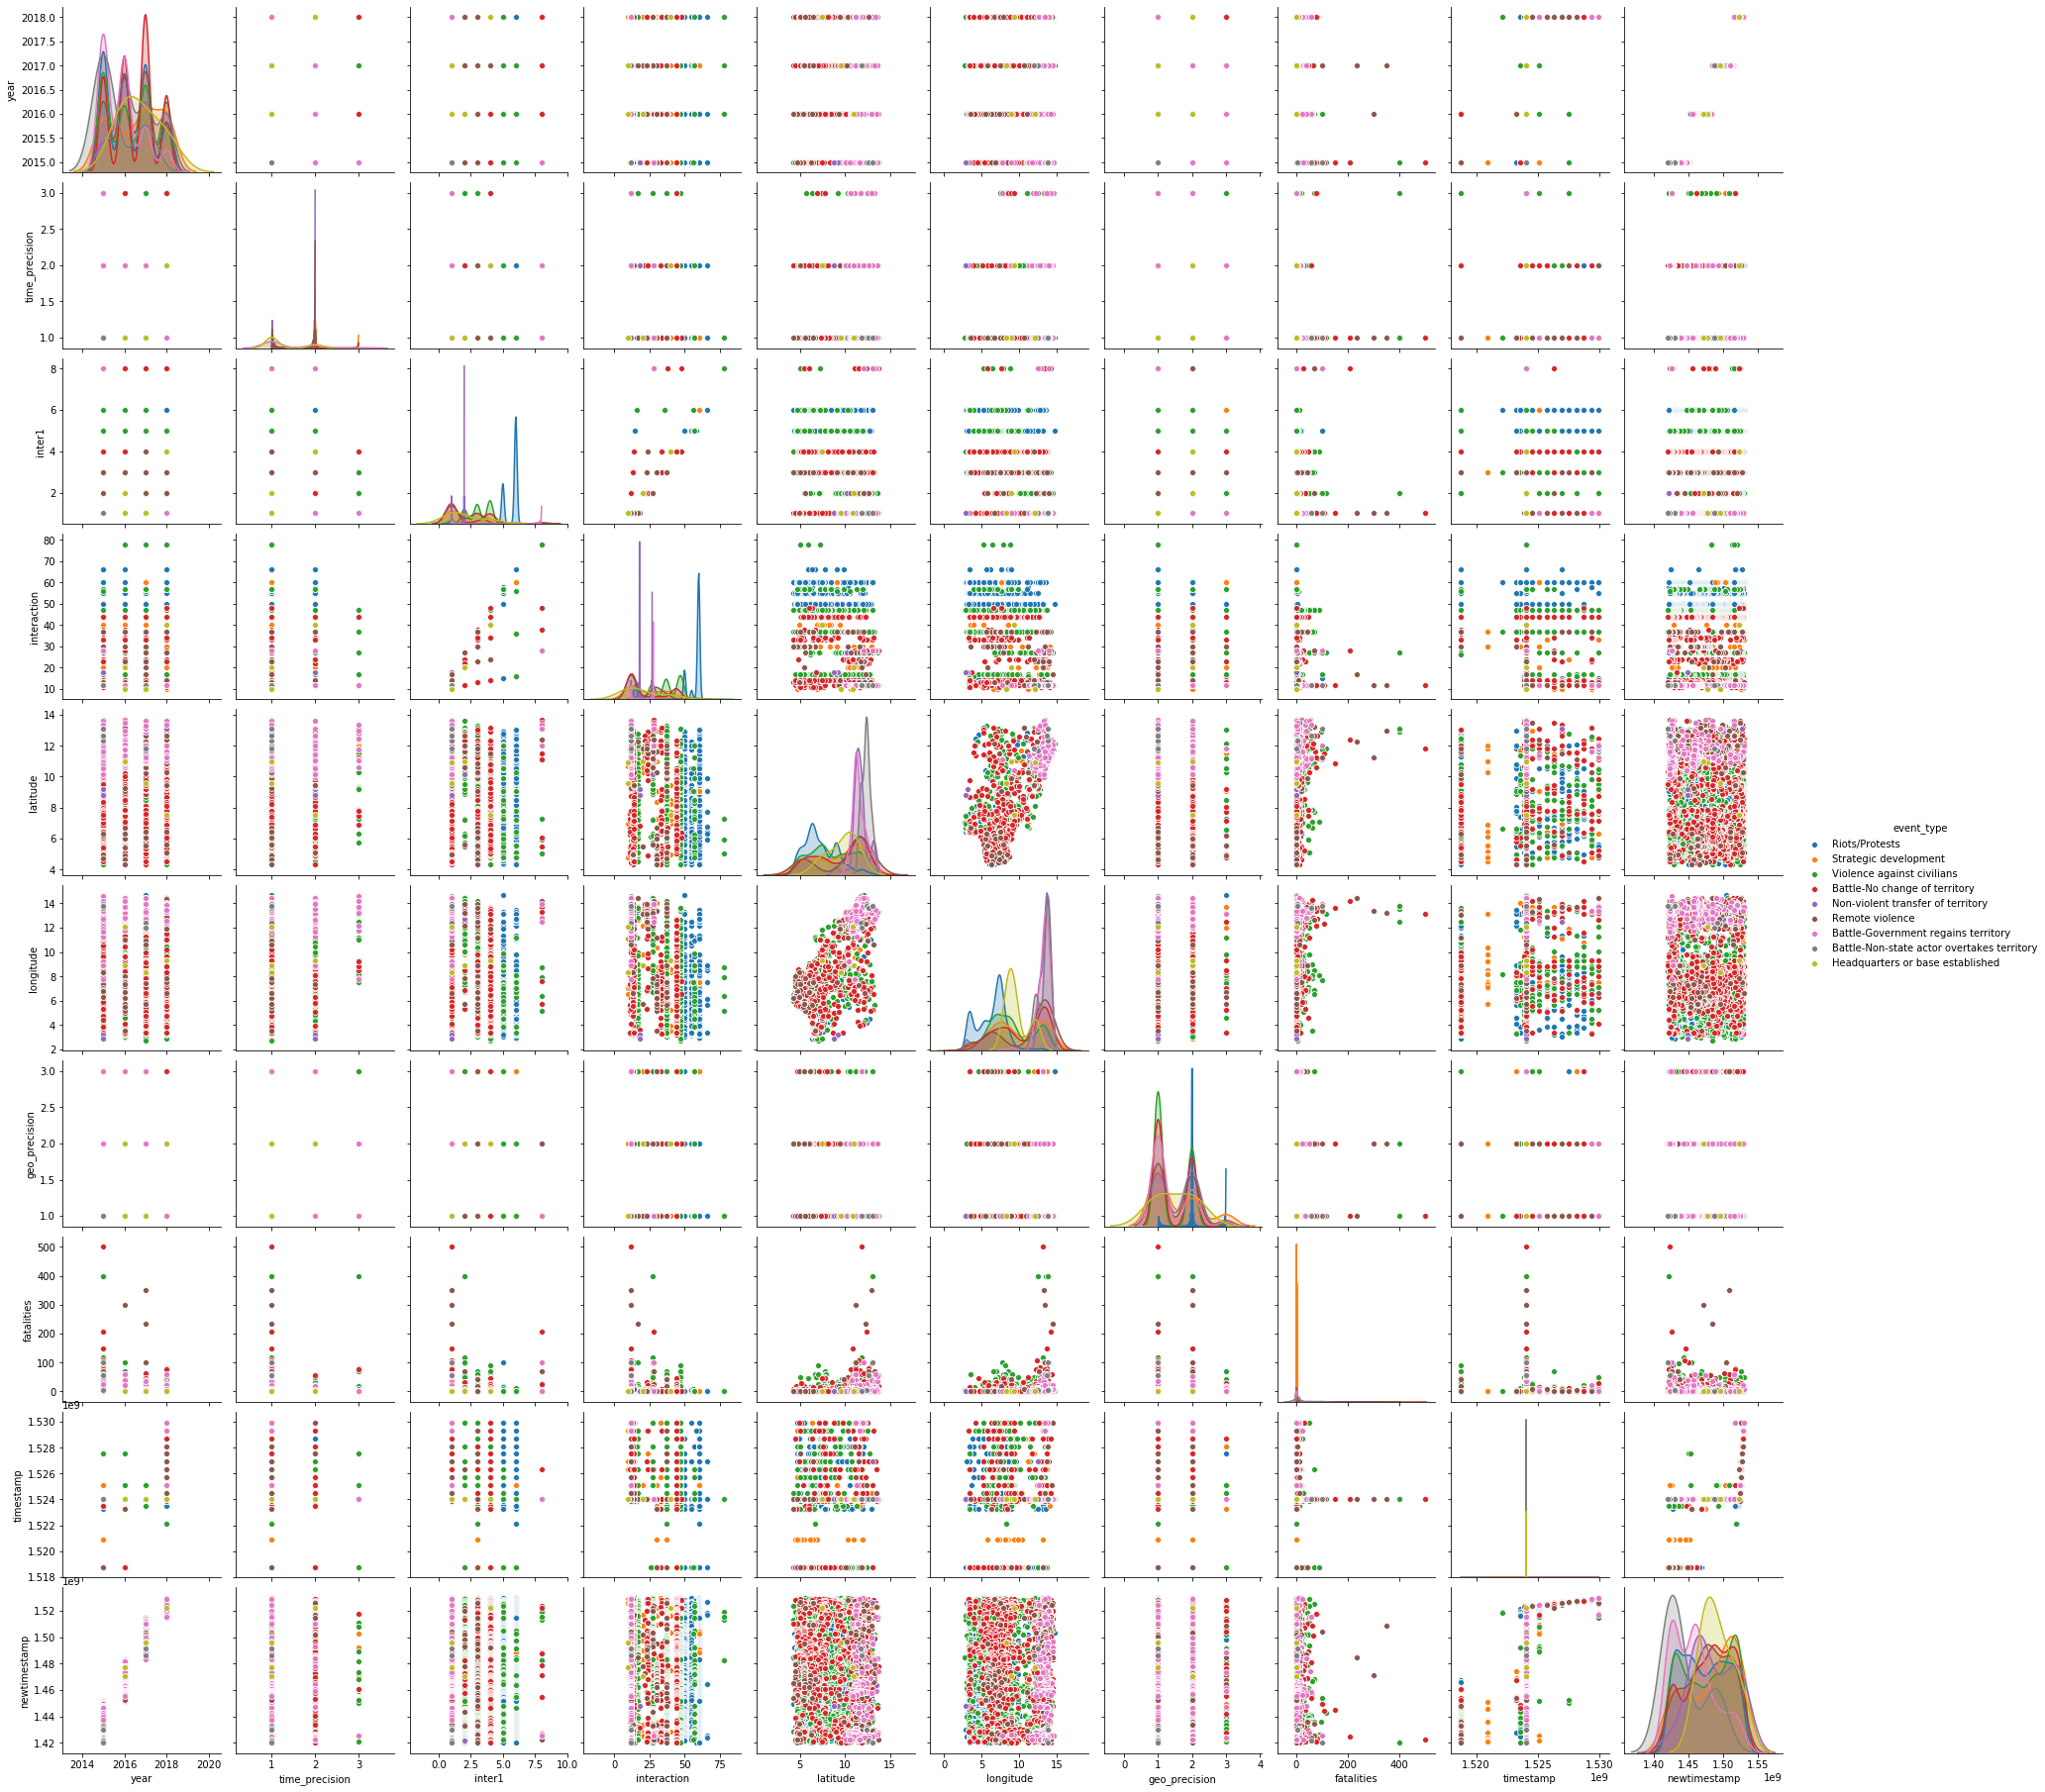

In [20]:
sns.pairplot(view_com_df,hue='event_type')

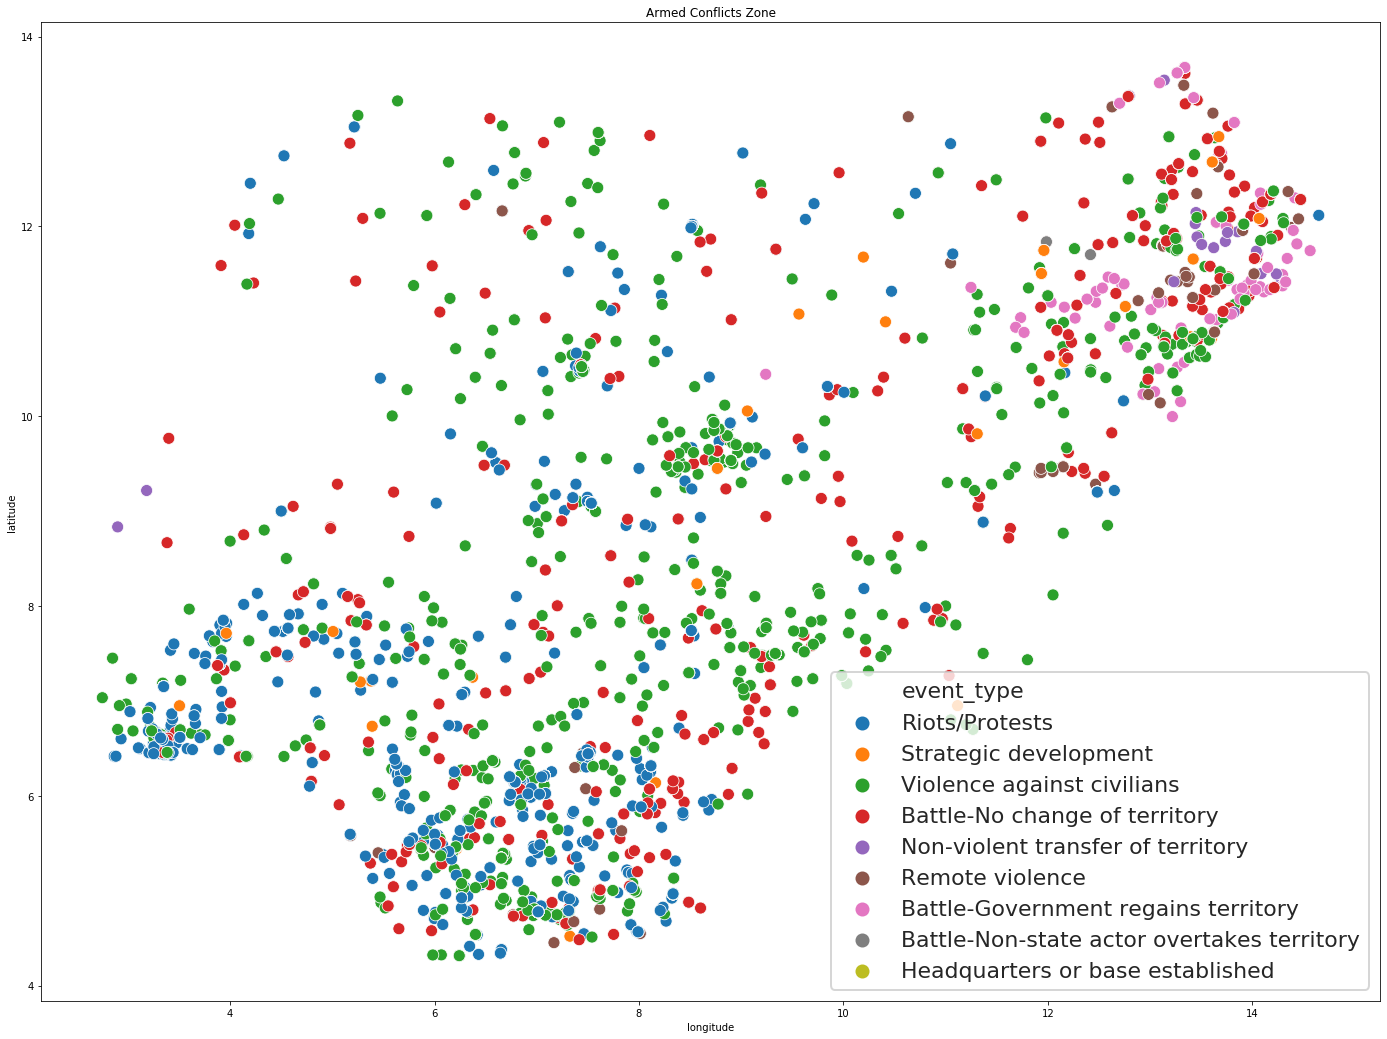

In [21]:

plt.figure(figsize = (24,18))
plt.title('Armed Conflicts Zone')
sns.set_style('white')
sns.set_context('poster')
sns.scatterplot(view_com_df['longitude'], view_com_df['latitude'], view_com_df['event_type'], cmap='warmcolor')
#sns.save('event_type.png')